In [18]:
import pandas as pd 
import os
from itertools import islice
from matplotlib import pyplot as plt
from scipy.spatial.distance import pdist, cdist, squareform

In [19]:
# global variables
min_n, max_n = 5, 8

In [3]:
gen = os.walk('../SymbTr/txt')

paths = [(a, b, c) for a, b, c in gen]
paths = [ (a,c) for a,b,c in paths][0]
paths = [path for path in paths[1]]

makam_dict = {}

for path in paths[1]:
    makam = path.split('--')[0]
    if makam in makam_dict:
        makam_dict[makam] += 1
    else:
        makam_dict[makam] = 1

for m in makam_dict:
    if makam_dict[m] > 19:
        print(m, makam_dict[m])

In [4]:
makam_dict = {'rast', 'ussak'}
paths_new = {}

for makam in makam_dict:
    counter = 0
    paths_list = []
    for path in paths:
        if path.split('--')[0] == makam:
            paths_list.append(path)
            counter += 1
        if counter == 3:
            paths_new[makam] = paths_list
            break
paths_new

{'rast': ['rast--turku--nimsofyan--sira_sira--.txt',
  'rast--sarki--musemmen--vuslatindan_gayri--haci_arif_bey.txt',
  'rast--sarki--senginsemai--sevda_ile_dillendi--munir_nurettin_selcuk.txt'],
 'ussak': ['ussak--yuruksemai--yuruksemai--dila_cunem--mahmut_celebi.txt',
  'ussak--turku--sofyan--telgirafin_tellerine-2.txt',
  'ussak--turku--nimsofyan--ayva_cicek--.txt']}

In [5]:
def get_relative_intervals(list_of_tuples):
    lt = [(0, list_of_tuples[0][1])]
    for i in range(1, len(list_of_tuples)):
        lt.append((list_of_tuples[i][0] - list_of_tuples[i - 1][0], list_of_tuples[i][1]))
    return lt

In [27]:
def get_sublists(listt, num):
    lists = []
    for i in range(0, len(listt)-num +1):
        lists.append(list(islice(listt, i, i+num)))
    return lists

In [61]:
def separete_lists_from_list_of_tuples(list_of_notes, min_n, max_n):
    komas_list = []
    dur_list = []
    for komas, dur in list_of_notes:
        komas_list.append(komas)
        dur_list.append(dur)
        
    return komas_list, dur_list
    
def norm_durations(durations):
    norm = []
    max_dur = max([x[1] for x in durations])
    for tdur in durations:
        norm.append(int((max_dur / tdur[1] * tdur[0])*100)/100)
    return norm

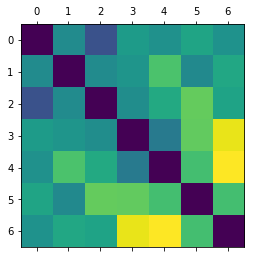

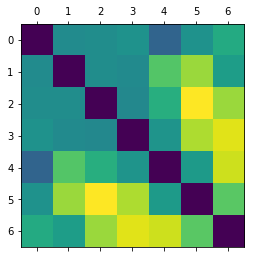

In [63]:
list_of_notes = ((23, (2,2)), (43, (3,3)), (34, (3,4)), (54, (6,4)), (34, (4,3)), (24, (4,3)), (12,(2,4)), (52, (1,6)), (62, (8,8)))
list_komas, list_dur = separete_lists_from_list_of_tuples(list_of_notes, min_n, max_n)

norm_list_dur = norm_durations(list_dur)

sublist3_komas = get_sublists(list_komas, 3)
sublist3_dur = get_sublists(norm_list_dur, 3)

dist_komas = pdist(sublist3_komas, 'euclidean')
dist_dur = pdist(sublist3_dur, 'euclidean')

plt.matshow(squareform(dist_komas))
plt.matshow(squareform(dist_dur))

